In [10]:
import torch
from matplotlib import pyplot as plt

Q1

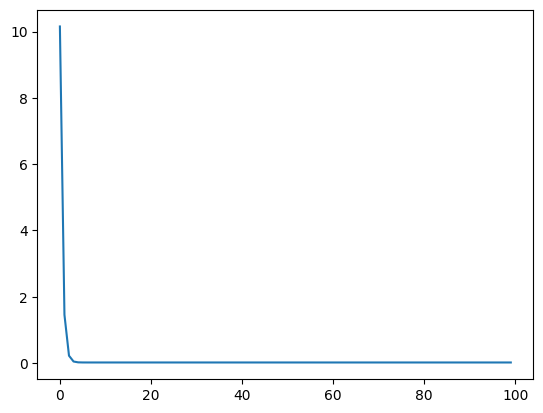

In [18]:
x = torch.tensor([12.4,14.3,14.5,14.9,16.1,16.9,16.5,15.4,17.0,17.9,18.8,20.3,22.4,19.4,15.5,16.7,17.3,18.4,19.2,17.4,19.5,19.7,21.2])
y = torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,14.6,15.1,16.1,16.8,15.2,17.0,17.2,18.6])
b=torch.tensor(1.0,requires_grad=True)
w=torch.tensor(1.0,requires_grad=True)
#print("The parametres are{},and {}".format(w,b))
learning_rate=torch.tensor(0.001)
loss_list=[]
for epochs in range(100):
    loss=0.0
    for j in range(len(x)):
        a=w*x[j]
        y_p=a+b
        loss+=(y_p-y[j])**2
    loss=loss / len(x)
    loss_list.append(loss.item())
    loss.backward()
    with torch.no_grad():
        w -= learning_rate* w.grad
        b -= learning_rate*b.grad 
    w.grad.zero_()
    b.grad.zero_()
   # print("The parameters are w={}, b={}, and loss={}".format(w, b, loss.item()))
#Display the plot
plt.plot(loss_list)
plt.show()

Q2

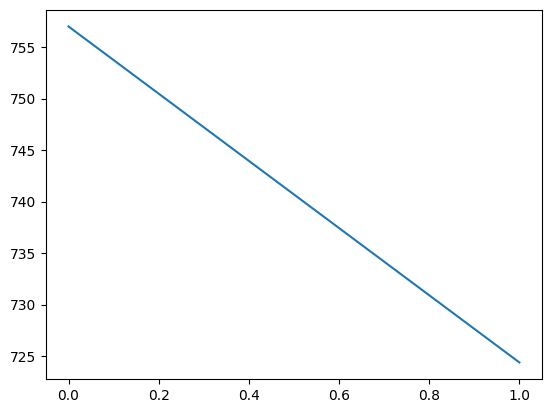

In [39]:
x = torch.tensor([2,4])
y = torch.tensor([20,40])
b=torch.tensor(1.0,requires_grad=True)
w=torch.tensor(1.0,requires_grad=True)
#print("The parametres are{},and {}".format(w,b))
learning_rate=torch.tensor(0.001)
loss_list=[]
for epochs in range(2):
    loss=0.0
    for j in range(len(x)):
        a=w*x[j]
        y_p=a+b
        loss+=(y_p-y[j])**2
    loss=loss / len(x)
    loss_list.append(loss.item())
    loss.backward()
    with torch.no_grad():
        w -= learning_rate* w.grad
        b -= learning_rate*b.grad 
    w.grad.zero_()
    b.grad.zero_()
   # print("The parameters are w={}, b={}, and loss={}".format(w, b, loss.item()))
#Display the plot
plt.plot(loss_list)
plt.show()

Analytical Solution
After 0 epochs, w = 1.2100000381469727,b = 1.0700000524520874,loss = 757.0


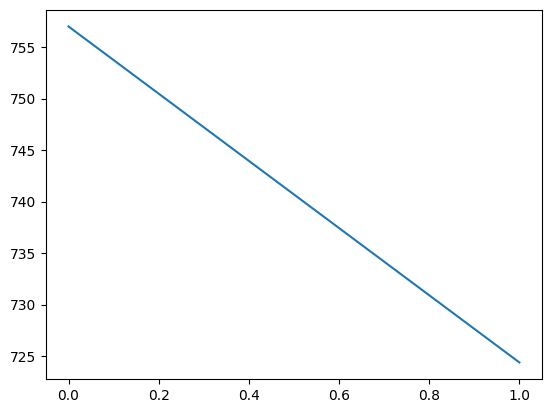

In [41]:
def analytical(x,y,w,b):  
    loss = 0.0
    loss_list = []
    for epochs in range(2):
        for j in range(len(x)):
            y_p = w*x[j] + b
            loss += (y[j] - y_p)**2
        loss = loss/len(x)
        loss_list.append(loss.item())
        wgrad,bgrad = 0,0
        for i in range(len(x)):
            wgrad += (y_p - y[j])*(x[i])
            bgrad += (y_p - y[j])
        w -= 0.001*wgrad*2/len(x)
        b -= 0.001*bgrad*2/len(x)
        
        if epochs%10==0:
            print("After {} epochs, w = {},b = {},loss = {}".format(epochs,w,b,loss))

print("Analytical Solution")
analytical(x,y,1,1)

plt.plot(loss_list)

Q3

After 0 epochs, The parameters are w=tensor([4.9285], requires_grad=True),b=tensor([1.0437], requires_grad=True), and loss =27052.34375
After 10 epochs, The parameters are w=tensor([12.7817], requires_grad=True),b=tensor([1.6183], requires_grad=True), and loss =487.71942138671875
After 20 epochs, The parameters are w=tensor([12.8830], requires_grad=True),b=tensor([1.6600], requires_grad=True), and loss =482.96600341796875
After 30 epochs, The parameters are w=tensor([12.8820], requires_grad=True),b=tensor([1.6946], requires_grad=True), and loss =482.84564208984375
After 40 epochs, The parameters are w=tensor([12.8797], requires_grad=True),b=tensor([1.7289], requires_grad=True), and loss =482.72686767578125
After 50 epochs, The parameters are w=tensor([12.8773], requires_grad=True),b=tensor([1.7632], requires_grad=True), and loss =482.60894775390625
After 60 epochs, The parameters are w=tensor([12.8750], requires_grad=True),b=tensor([1.7973], requires_grad=True), and loss =482.4921875
A

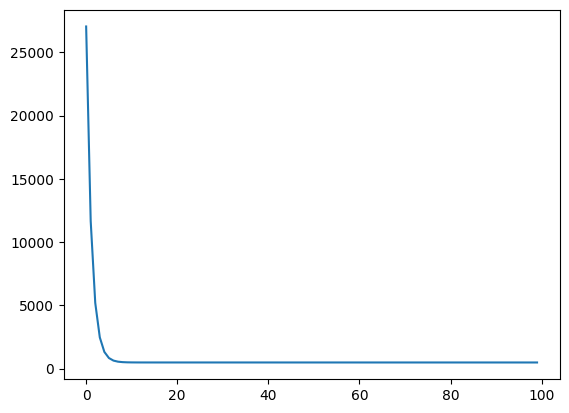

In [32]:
x = torch.tensor([5.0,7.0,12.0,16.0,20.0])
y = torch.tensor([40.0,120.0,180.0,210.0,240.0])
learning_rate = torch.tensor(0.001)

class RegressionModel:
    def __init__(self):
        self.w = torch.rand([1],requires_grad = True)
        self.b = torch.rand([1],requires_grad = True)
    def forward(self,x):
        return self.w*x + self.b
    def update(self):
        self.w -= learning_rate*self.w.grad
        self.b -= learning_rate*self.b.grad
    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

def criterion(yj,y_p):
    return (yj - y_p)**2

model = RegressionModel()
loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        y_p = model.forward(x[j])
        loss += criterion(y[j],y_p);
    loss = loss/len(x)
    loss_list.append(loss.item())

    loss.backward()

    with torch.no_grad():
        model.update()
    model.reset_grad()
    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w,model.b,loss.item()))

plt.plot(loss_list)

Q4

[tensor([16., 20.,  7., 12.]), tensor([210., 240., 120., 180.])]
[tensor([5.]), tensor([40.])]
After 0 epochs, The parameters are w=Parameter containing:
tensor([13.6006], requires_grad=True),b=Parameter containing:
tensor([1.1637], requires_grad=True), and loss =523.9497680664062
After 10 epochs, The parameters are w=Parameter containing:
tensor([11.8936], requires_grad=True),b=Parameter containing:
tensor([1.3610], requires_grad=True), and loss =1218.099365234375
After 20 epochs, The parameters are w=Parameter containing:
tensor([13.7772], requires_grad=True),b=Parameter containing:
tensor([2.0401], requires_grad=True), and loss =1890.1585693359375
After 30 epochs, The parameters are w=Parameter containing:
tensor([14.5132], requires_grad=True),b=Parameter containing:
tensor([2.2606], requires_grad=True), and loss =1517.795166015625
After 40 epochs, The parameters are w=Parameter containing:
tensor([13.0594], requires_grad=True),b=Parameter containing:
tensor([2.6323], requires_grad=

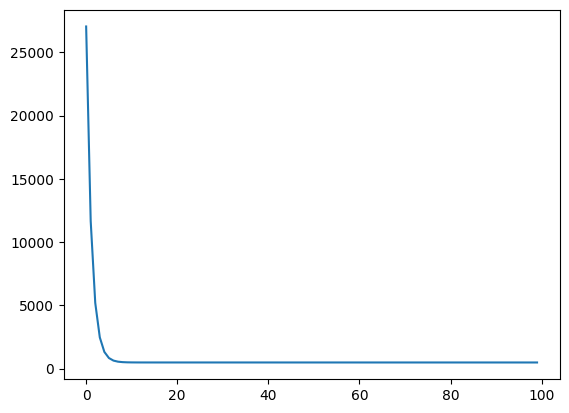

In [34]:
import torch
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx],self.Y[idx]

x = torch.tensor([5.0,7.0,12.0,16.0,20.0])
y = torch.tensor([40.0,120.0,180.0,210.0,240.0])
dataset = MyDataset(x,y)
data_loader = DataLoader(dataset,batch_size=4,shuffle=True)

for data in iter(data_loader):
    print(data)
    
learning_rate = torch.tensor(0.001)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x):
        return self.w*x + self.b

loss_fn = torch.nn.MSELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.003)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
    loss += loss.item()

    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w,model.b,loss.item()))

    finalloss = loss/len(data_loader)*4

print(finalloss)

plt.plot(loss_list)

Q5

In [35]:
import torch
import numpy as np
from torch.autograd import Variable

x = Variable(torch.tensor([12.4,14.3,14.5,14.9,16.1,16.9,16.5,15.4,17.0,17.9,18.8,20.3,22.4,19.4,15.5,16.7,17.3,18.4,19.2,17.4,19.5,19.7,21.2]))
y = Variable(torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,14.6,15.1,16.1,16.8,15.2,17.0,17.2,18.6]))

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear = torch.nn.Linear(23, 23)
        
    def forward(self,x):
        return self.linear(x)

model = RegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

for epochs in range(100):
    pred_y = model(x)
    loss = criterion(pred_y, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epochs%10==0:
        print("After {} epochs, loss ={}".format(epochs,loss.item()))


After 0 epochs, loss =249.6795196533203
After 10 epochs, loss =9.183462452710955e-07
After 20 epochs, loss =1.3444704334217294e-12
After 30 epochs, loss =6.722352167108647e-13
After 40 epochs, loss =5.931487397602131e-13
After 50 epochs, loss =5.931487397602131e-13
After 60 epochs, loss =5.536054470747787e-13
After 70 epochs, loss =5.536054470747787e-13
After 80 epochs, loss =5.536054470747787e-13
After 90 epochs, loss =5.536054470747787e-13


Q6 

In [36]:
import torch
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):
    def __init__(self,X1,X2,Y):
        self.X1 = X1
        self.X2 = X2
        self.Y = Y
    def __len__(self):
        return len(self.X1)
    def __getitem__(self,idx):
        return self.X1[idx],self.X2[idx],self.Y[idx]

x1 = torch.tensor([3,4,5,6,2])
x2 = torch.tensor([8,5,7,3,1])
y = torch.tensor([-3.5,3.5,2.5,11.5,5.7])
dataset = MyDataset(x1,x2,y)
data_loader = DataLoader(dataset,batch_size=2,shuffle=True)

for data in iter(data_loader):
    print(data)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w1 = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.w2 = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x1,x2):
        return self.w1*x1 + self.w2*x2 + self.b

loss_fn = torch.nn.MSELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        x1,x2,labels = data
        optimizer.zero_grad()
        outputs = model(x1,x2)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
    loss += loss.item()

    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w1,model.w2,model.b,loss.item()))

    finalloss = loss/len(data_loader)*4

print(finalloss)

[tensor([6, 3]), tensor([3, 8]), tensor([11.5000, -3.5000])]
[tensor([4, 5]), tensor([5, 7]), tensor([3.5000, 2.5000])]
[tensor([2]), tensor([1]), tensor([5.7000])]
After 0 epochs, The parameters are w=Parameter containing:
tensor([0.7430], requires_grad=True),b=Parameter containing:
tensor([0.3554], requires_grad=True), and loss =Parameter containing:
tensor([0.8758], requires_grad=True)
After 10 epochs, The parameters are w=Parameter containing:
tensor([0.8434], requires_grad=True),b=Parameter containing:
tensor([-0.2400], requires_grad=True), and loss =Parameter containing:
tensor([0.8789], requires_grad=True)
After 20 epochs, The parameters are w=Parameter containing:
tensor([1.1660], requires_grad=True),b=Parameter containing:
tensor([-0.4621], requires_grad=True), and loss =Parameter containing:
tensor([0.9309], requires_grad=True)
After 30 epochs, The parameters are w=Parameter containing:
tensor([1.3770], requires_grad=True),b=Parameter containing:
tensor([-0.6909], requires_gr

Q7

In [37]:
import torch
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx],self.Y[idx]

x = torch.tensor([1,5,10,10,25,50,70,75,100])
y = torch.tensor([0,0,0,0,0,1,1,1,1])
dataset = MyDataset(x,y)
data_loader = DataLoader(dataset,batch_size=1,shuffle=False)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x):
        return self.w*x + self.b

loss_fn = torch.nn.BCELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        sigmoid = torch.nn.Sigmoid()
        outputs = sigmoid(outputs)
        labels = labels.to(torch.float32)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
        loss += loss.item()

    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w,model.b,loss.item()))

    finalloss = loss/len(data_loader)*4

print(finalloss)

After 0 epochs, The parameters are w=Parameter containing:
tensor([0.3849], requires_grad=True),b=Parameter containing:
tensor([0.5584], requires_grad=True), and loss =0.0
After 10 epochs, The parameters are w=Parameter containing:
tensor([0.0354], requires_grad=True),b=Parameter containing:
tensor([0.5192], requires_grad=True), and loss =0.04215121641755104
After 20 epochs, The parameters are w=Parameter containing:
tensor([0.0358], requires_grad=True),b=Parameter containing:
tensor([0.4913], requires_grad=True), and loss =0.0415630117058754
After 30 epochs, The parameters are w=Parameter containing:
tensor([0.0362], requires_grad=True),b=Parameter containing:
tensor([0.4637], requires_grad=True), and loss =0.040915120393037796
After 40 epochs, The parameters are w=Parameter containing:
tensor([0.0366], requires_grad=True),b=Parameter containing:
tensor([0.4363], requires_grad=True), and loss =0.04027777537703514
After 50 epochs, The parameters are w=Parameter containing:
tensor([0.03